In [229]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

In [230]:
# loading data set
stock = pd.read_csv(r"C:\Users\asbid\Downloads\stock.csv")

In [231]:
stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-01-26,26.624082,27.129914,26.327984,27.055891,45880000,0.0,0.0
1,2017-01-27,27.124978,27.608603,26.858490,27.578993,47199600,0.0,0.0
2,2017-01-30,27.369262,27.391470,26.626552,27.147188,49600400,0.0,0.0
3,2017-01-31,26.883162,27.154586,26.698101,26.939915,36275600,0.0,0.0
4,2017-02-01,27.285365,28.158852,27.107706,28.116903,59000400,0.0,0.0


In [232]:
#checking datatype
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1259 non-null   object 
 1   Open          1259 non-null   float64
 2   High          1259 non-null   float64
 3   Low           1259 non-null   float64
 4   Close         1259 non-null   float64
 5   Volume        1259 non-null   int64  
 6   Dividends     1259 non-null   float64
 7   Stock Splits  1259 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 78.8+ KB


In [233]:
# Changing dtype of date to datetime
dates = pd.to_datetime(stock['Date'])
dates.tail()

1254   2022-01-19
1255   2022-01-20
1256   2022-01-21
1257   2022-01-24
1258   2022-01-25
Name: Date, dtype: datetime64[ns]

In [234]:
# checking for null values
stock.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [235]:
# split into train and test sets
train_size = int(len(stock) * 0.67)
test_size = len(stock) - train_size
train, test = stock[0:train_size], stock[train_size:len(stock)]
print(len(train), len(test))

843 416


In [236]:
#creating training df
training_df = train.drop(['Date','Volume','Dividends','Stock Splits'],axis = 1)
training_df.head()

,Open,High,Low,Close
0,26.624082,27.129914,26.327984,27.055891
1,27.124978,27.608603,26.858490,27.578993
2,27.369262,27.391470,26.626552,27.147188
3,26.883162,27.154586,26.698101,26.939915
4,27.285365,28.158852,27.107706,28.116903


In [237]:
training_df.shape

(843, 4)

In [238]:
#Scaling
scaler = StandardScaler()
scaler = scaler.fit(training_df)
training_df_scaled = scaler.transform(training_df)

In [239]:
training_df_scaled

array([[-1.67064966, -1.66258311, -1.65733853, -1.63589517],
       [-1.63354768, -1.62774494, -1.617402  , -1.59723295],
       [-1.61545328, -1.64354754, -1.63486229, -1.62914744],
       ...,
       [ 2.68152062,  2.80997097,  2.73592728,  2.91164982],
       [ 2.88759716,  2.78472915,  2.88957878,  2.86056577],
       [ 2.86024431,  2.78218702,  2.86591201,  2.87458227]])

In [240]:
training_df_scaled.shape

(843, 4)

In [241]:
len(training_df_scaled)

843

In [242]:
training_df_scaled

array([[-1.67064966, -1.66258311, -1.65733853, -1.63589517],
       [-1.63354768, -1.62774494, -1.617402  , -1.59723295],
       [-1.61545328, -1.64354754, -1.63486229, -1.62914744],
       ...,
       [ 2.68152062,  2.80997097,  2.73592728,  2.91164982],
       [ 2.88759716,  2.78472915,  2.88957878,  2.86056577],
       [ 2.86024431,  2.78218702,  2.86591201,  2.87458227]])

In [243]:
#Splitting dataset
n_future = 1
n_past = 14

In [244]:
X_train = []
y_train = []

In [248]:
for i in range(n_past, len(training_df_scaled) - n_future +1):
    X_train.append(training_df_scaled[i - n_past:i, 0:training_df_scaled.shape[1]])
    y_train.append(training_df_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train  = np.array(X_train), np.array(y_train)

In [249]:
X_train.shape

(829, 14, 4)

In [250]:
X_train.shape

(829, 14, 4)

In [251]:
y_train.shape

(829, 1)

In [252]:
#defining a model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1:]), return_sequences=False))
#model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse',metrics = ['Accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 64)                17664     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,729
Trainable params: 17,729
Non-trainable params: 0
_________________________________________________________________


In [253]:
# fit the model
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/5
47/47 [==============================] - 1s 7ms/step - loss: 0.2487 - Accuracy: 0.0000e+00 - val_loss: 0.1047 - val_Accuracy: 0.0000e+00
Epoch 2/5
47/47 [==============================] - 0s 4ms/step - loss: 0.0364 - Accuracy: 0.0000e+00 - val_loss: 0.0818 - val_Accuracy: 0.0000e+00
Epoch 3/5
47/47 [==============================] - 0s 4ms/step - loss: 0.0303 - Accuracy: 0.0000e+00 - val_loss: 0.0706 - val_Accuracy: 0.0000e+00
Epoch 4/5
47/47 [==============================] - 0s 4ms/step - loss: 0.0264 - Accuracy: 0.0000e+00 - val_loss: 0.0738 - val_Accuracy: 0.0000e+00
Epoch 5/5
47/47 [==============================] - 0s 4ms/step - loss: 0.0267 - Accuracy: 0.0000e+00 - val_loss: 0.0632 - val_Accuracy: 0.0000e+00


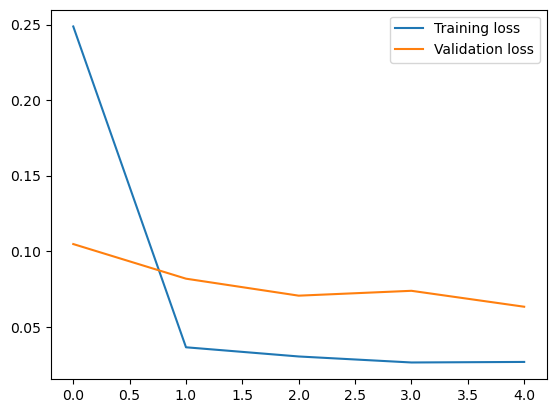

In [254]:
#Plotting lot
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [255]:
test_df = test.drop(['Date','Volume','Dividends','Stock Splits'],axis = 1)
test_df.head()

,Open,High,Low,Close
843,88.052941,88.492090,86.832787,87.526451
844,87.152008,89.301356,86.647751,87.536446
845,87.816027,89.838058,86.952297,89.069183
846,88.642320,88.767136,86.730127,87.920883
847,87.870948,90.963909,87.384160,90.327339


In [256]:
test_df=scaler.fit_transform(test_df)

In [257]:
n_future=1
n_past=14
x_test=[]
y_test=[]
for i in range(n_past,len(test_df)-n_future+1):
  x_test.append(test_df[i-n_past:i,0:test_df.shape[1]])
  y_test.append(test_df[i+n_future-1:i+n_future,3])
  
x_test,y_test = np.array(x_test),np.array(y_test)

In [258]:
y_pred=model.predict(x_test)
y_pred_train=model.predict(X_train)

26/26 [==============================] - 0s 2ms/step


In [259]:
y_pred.shape

(402, 1)

In [264]:
from sklearn.metrics import accuracy_score,mean_squared_error
trainScore = math.sqrt(mean_squared_error(y_train[0], y_pred[0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 0.41 RMSE


In [266]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.0136 - Accuracy: 0.0000e+00


[0.013550635427236557, 0.0]